## Import Libraries and Data

In [ ]:
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_excel("C:/Users/heeye/OneDrive/MSBA/Fall 2023/Intro to Business Analytics/HW4/HW4.xlsx") # change the path to your local path
df

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,29.50
1996,1997,1,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10.00
1997,1998,1,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0.00
1998,1999,1,0,0,0,0,0,0,0,0,...,0,1,1,253,253,0,1,1,0,0.06


## Exploratory Analysis

In [ ]:
df.describe().round(2)

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,...,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.0,2000.00
mean,1000.50,0.82,0.13,0.06,0.06,0.04,0.15,0.02,0.03,0.05,...,0.02,0.14,1.42,2155.10,2435.60,0.43,0.52,0.22,0.5,102.56
std,577.49,0.38,0.33,0.23,0.24,0.20,0.36,0.13,0.18,0.22,...,0.13,0.34,1.41,1141.30,1077.87,0.49,0.50,0.42,0.5,186.75
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00
25%,500.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1133.00,1671.25,0.00,0.00,0.00,0.0,0.00
50%,1000.50,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,2280.00,2721.00,0.00,1.00,0.00,0.5,1.86
75%,1500.25,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.00,3139.25,3353.00,1.00,1.00,0.00,1.0,152.53
max,2000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,15.00,4188.00,4188.00,1.00,1.00,1.00,1.0,1500.06


<Axes: ylabel='Frequency'>

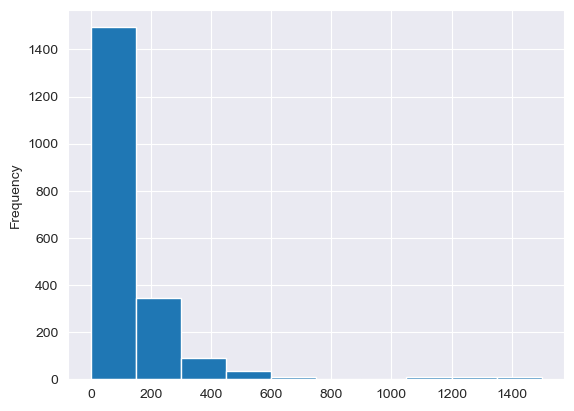

In [ ]:
df['Spending'].plot.hist()

<Axes: >

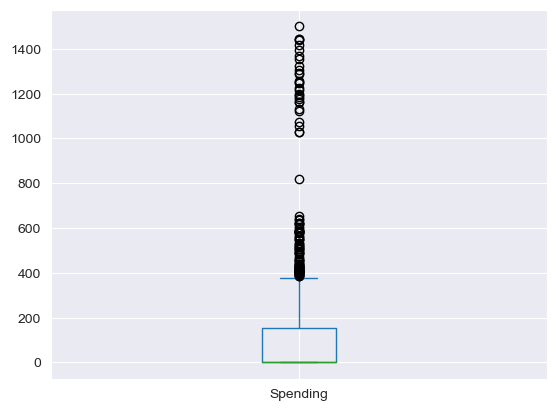

In [ ]:
df['Spending'].plot.box()

<Axes: ylabel='Frequency'>

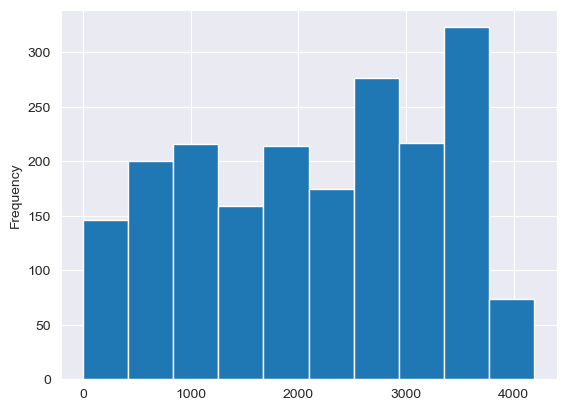

In [ ]:
df['last_update_days_ago'].plot.hist()

<Axes: ylabel='Frequency'>

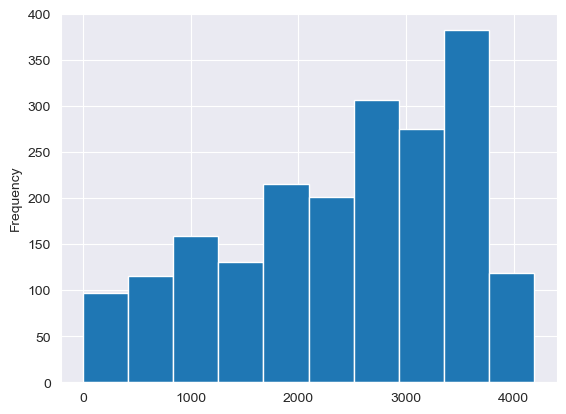

In [ ]:
df['1st_update_days_ago'].plot.hist()

<Axes: ylabel='Frequency'>

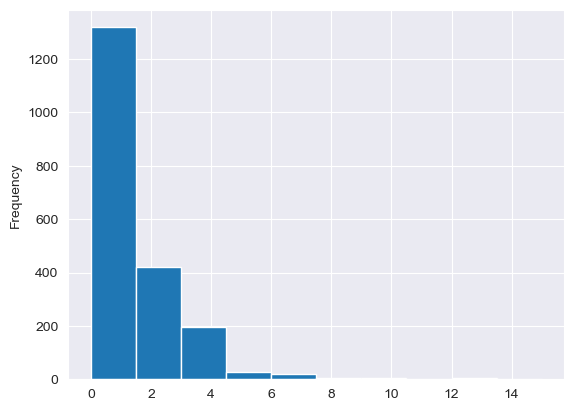

In [ ]:
df['Freq'].plot.hist()

In [ ]:
# Check if missing values exist
df.isna().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

In [ ]:
print(df['Purchase'].value_counts())
print(df['source_a'].value_counts())
print(df['US'].value_counts())
print(df['Gender=male'].value_counts())
print(df['source_p'].value_counts())
print(df['source_o'].value_counts())

Purchase
1    1000
0    1000
Name: count, dtype: int64
source_a
0    1747
1     253
Name: count, dtype: int64
US
1    1649
0     351
Name: count, dtype: int64
Gender=male
1    1049
0     951
Name: count, dtype: int64
source_p
0    1988
1      12
Name: count, dtype: int64
source_o
0    1933
1      67
Name: count, dtype: int64


Through investigation, we found out that the distribution of the values in source variables are generally more imbalanced than other binary variables.

In [ ]:
numeric_cols = ['Freq','last_update_days_ago','1st_update_days_ago']

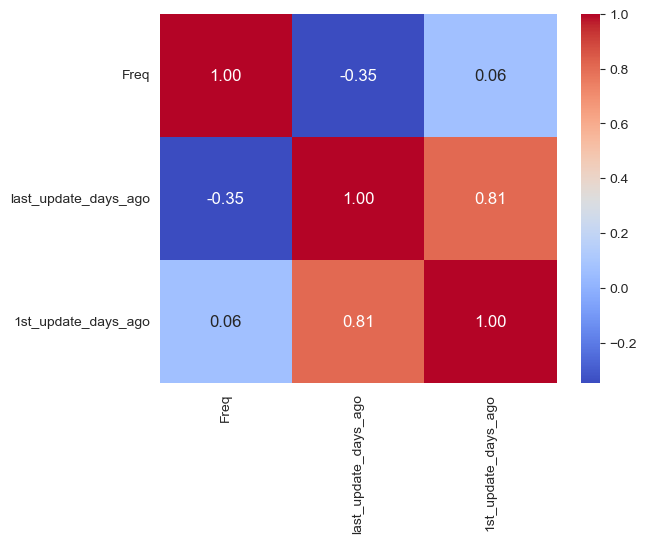

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Investigate the correlation of numeric variables
cm = df[numeric_cols].corr()

sns.heatmap(cm, annot=True, cmap='coolwarm',fmt='.2f',annot_kws={'size': 12}, yticklabels=numeric_cols, xticklabels=numeric_cols)
plt.figure(figsize=(10, 10))
plt.show()

Text(0, 0.5, 'Days ago was first update')

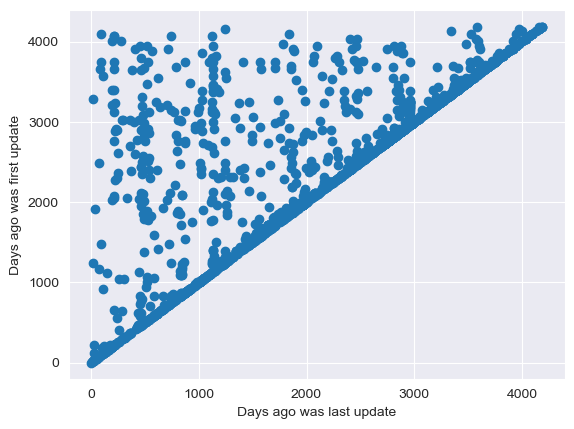

In [ ]:
# Further visualize the relationship between last_update and 1st_update
plt.scatter(df['last_update_days_ago'], df['1st_update_days_ago'])

# Add labels and a title
plt.xlabel('Days ago was last update')
plt.ylabel('Days ago was first update')

In [ ]:
X = df.iloc[:,1:-1]
y = df.Spending

## Cross-Validation for the three models

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

cv = KFold(n_splits=10, shuffle=True, random_state=42)

# linear regression class
slr = LinearRegression(fit_intercept=True,
                       n_jobs=-1)

scores_MAE=cross_val_score(slr,
                          X,
                          y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("MAE: %0.2f (+/- %0.2f)" % (abs(scores_MAE.mean()), scores_MAE.std()))

scores_MSE=cross_val_score(slr,
                          X,
                          y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (abs(scores_MSE.mean()), scores_MSE.std()))

MAE: 70.21 (+/- 6.55)
MSE: 14977.83 (+/- 4838.32)


#### kNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from math import sqrt
knn = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsRegressor(p=2, metric='minkowski'))
      ])

knnscores_MAE=cross_val_score(knn,
                          X,
                          y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("kNN MAE: %0.2f (+/- %0.2f)" % (abs(knnscores_MAE.mean()), knnscores_MAE.std()))

knnscores_MSE=cross_val_score(knn,
                          X,
                          y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("kNN MSE: %0.2f (+/- %0.2f)" % (abs(knnscores_MSE.mean()), knnscores_MSE.std()))

kNN MAE: 58.67 (+/- 9.35)
kNN MSE: 17572.53 (+/- 6204.61)


#### Regression Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=10)

treescores_MAE=cross_val_score(tree,
                          X,
                          y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("tree MAE: %0.2f (+/- %0.2f)" % (abs(treescores_MAE.mean()), treescores_MAE.std()))

treescores_MSE=cross_val_score(tree,
                          X,
                          y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("tree MSE: %0.2f (+/- %0.2f)" % (abs(treescores_MSE.mean()), treescores_MSE.std()))



tree MAE: 53.63 (+/- 9.02)
tree MSE: 17719.06 (+/- 6844.49)


## Feature Engineering

We considered using several different feature engineering methods, including adding polynomial features and applying transformation.

#### 1. Adding polynomial features
Based on the exploratory analysis, it seems like the variables 'last_update_days_ago' and '1st_update_days_ago' have nonlinear patterns. Therefore, we decided to add more complex features to capture this relationship.

##### Cubic Try

In [ ]:
# First try cubic transformation
from sklearn.preprocessing import PolynomialFeatures

last_update_days_ago = df['last_update_days_ago'].values.reshape(-1, 1)

# Create PolynomialFeatures for degree 3
cubic = PolynomialFeatures(degree=3)

# Transform the 1D array to 2D polynomial features
last_cubic = cubic.fit_transform(last_update_days_ago)

# Assuming df['1st_update_days_ago'] is your 1D array
first_update_days_ago = df['1st_update_days_ago'].values.reshape(-1, 1)

# Transform the 1D array to 2D polynomial features
first_cubic = cubic.fit_transform(first_update_days_ago)

# Create DataFrames from the polynomial features
last_cubic_df = pd.DataFrame(last_cubic, columns=[f'last_cubic_{i}' for i in range(last_cubic.shape[1])])
first_cubic_df = pd.DataFrame(first_cubic, columns=[f'first_cubic_{i}' for i in range(first_cubic.shape[1])])

# Concatenate the cubic features with your original dataset
df_cubic = pd.concat([df, last_cubic_df, first_cubic_df], axis=1)


In [ ]:
df_cubic = df_cubic.drop(columns= ['sequence_number'])
X_cubic = df_cubic.drop(columns=['Spending'])

In [ ]:
# Linear Regression
cscores_MAE=cross_val_score(slr,
                          X_cubic,
                          y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("Linear Regression MAE: %0.2f (+/- %0.2f)" % (abs(cscores_MAE.mean()), cscores_MAE.std()))

cscores_MSE=cross_val_score(slr,
                          X_cubic,
                          y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (abs(cscores_MSE.mean()), cscores_MSE.std()))

# kNN
cknnscores_MAE=cross_val_score(knn,
                         X_cubic,
                          y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("kNN MAE: %0.2f (+/- %0.2f)" % (abs(cknnscores_MAE.mean()), cknnscores_MAE.std()))

cknnscores_MSE=cross_val_score(knn,
                          X_cubic,
                          y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("kNN MSE: %0.2f (+/- %0.2f)" % (abs(cknnscores_MSE.mean()), cknnscores_MSE.std()))

# Trees
ctreescores_MAE=cross_val_score(tree,
                          X_cubic,
                          y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("tree MAE: %0.2f (+/- %0.2f)" % (abs(ctreescores_MAE.mean()), ctreescores_MAE.std()))

ctreescores_MSE=cross_val_score(tree,
                          X_cubic,
                          y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("tree MSE: %0.2f (+/- %0.2f)" % (abs(ctreescores_MSE.mean()), ctreescores_MSE.std()))

Linear Regression MAE: 69.26 (+/- 6.03)
Linear Regression MSE: 14914.14 (+/- 4533.12)
kNN MAE: 61.30 (+/- 8.97)
kNN MSE: 18089.14 (+/- 5981.41)
tree MAE: 54.62 (+/- 8.53)
tree MSE: 18287.06 (+/- 7979.46)


##### Quadratic Try

In [ ]:
# First try quadratic transformation
quad = PolynomialFeatures(degree=2)

last_quad = quad.fit_transform(last_update_days_ago)

# Assuming df['1st_update_days_ago'] is your 1D array
first_update_days_ago = df['1st_update_days_ago'].values.reshape(-1, 1)

# Transform the 1D array to 2D polynomial features
first_quad = quad.fit_transform(first_update_days_ago)

# Create DataFrames from the polynomial features
last_quad_df = pd.DataFrame(last_quad, columns=[f'last_quad_{i}' for i in range(last_quad.shape[1])])
first_quad_df = pd.DataFrame(first_quad, columns=[f'first_quad_{i}' for i in range(first_quad.shape[1])])

# Concatenate the cubic features with your original dataset
df_quad = pd.concat([df, last_quad_df, first_quad_df], axis=1)

In [ ]:
X_quad = df_quad.drop(columns=['Spending','sequence_number'])
y_quad = df_quad['Spending']

In [ ]:
# Linear Regression
qscores_MAE=cross_val_score(slr,
                          X_quad,
                          y_quad,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("Linear Regression MAE: %0.2f (+/- %0.2f)" % (abs(qscores_MAE.mean()), qscores_MAE.std()))

qscores_MSE=cross_val_score(slr,
                          X_quad,
                          y_quad,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (abs(qscores_MSE.mean()), qscores_MSE.std()))

#kNN
qknnscores_MAE=cross_val_score(knn,
                         X_quad,
                          y_quad,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("kNN MAE: %0.2f (+/- %0.2f)" % (abs(qknnscores_MAE.mean()), qknnscores_MAE.std()))

qknnscores_MSE=cross_val_score(knn,
                          X_quad,
                          y_quad,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("kNN MSE: %0.2f (+/- %0.2f)" % (abs(qknnscores_MSE.mean()), qknnscores_MSE.std()))

# Trees
qtreescores_MAE=cross_val_score(tree,
                          X_quad,
                          y_quad,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("tree MAE: %0.2f (+/- %0.2f)" % (abs(qtreescores_MAE.mean()), qtreescores_MAE.std()))

qtreescores_MSE=cross_val_score(tree,
                         X_quad,
                          y_quad,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("tree MSE: %0.2f (+/- %0.2f)" % (abs(qtreescores_MSE.mean()), qtreescores_MSE.std()))

Linear Regression MAE: 69.35 (+/- 5.98)
Linear Regression MSE: 14880.85 (+/- 4681.63)
kNN MAE: 60.04 (+/- 9.50)
kNN MSE: 17695.88 (+/- 6258.24)
tree MAE: 52.91 (+/- 8.24)
tree MSE: 17956.15 (+/- 7284.89)


Turns out quadratic transformation is better than cubic transformation!

#### 2. Applying Transformation
We also noticed that the 'Freq' and the target variable 'Spending' do not follow a normal distribution. To improve performance, we decided to apply log transformation to the variables.

In [ ]:
Frequency = df['Freq'].values
Spending = df['Spending'].values

df_log = df.drop(columns= ['sequence_number'])

# transform features
# The log transformation can be used to make highly skewed distributions less skewed
df_log['Frequency_log'] = np.log(Frequency+1/3)
df_log['y_log'] = np.log(y+1/3)


In [ ]:
featured_X = df_log.drop(columns=['y_log','Spending'])
featured_y = df_log['y_log']

#### Evaluate the three techniques

##### Linear Regression

In [ ]:
# Linear Regression
newscores_MAE=cross_val_score(slr,
                          featured_X,
                          featured_y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("Linear Regression MAE: %0.2f (+/- %0.2f)" % (abs(newscores_MAE.mean()), newscores_MAE.std()))

newscores_MSE=cross_val_score(slr,
                          featured_X,
                          featured_y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (abs(newscores_MSE.mean()), newscores_MSE.std()))


Linear Regression MAE: 0.34 (+/- 0.03)
Linear Regression MSE: 0.32 (+/- 0.04)


##### kNN

In [ ]:
nknnscores_MAE=cross_val_score(knn,
                         featured_X,
                         featured_y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("kNN MAE: %0.2f (+/- %0.2f)" % (abs(nknnscores_MAE.mean()), nknnscores_MAE.std()))

nknnscores_MSE=cross_val_score(knn,
                          featured_X,
                          featured_y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("kNN MSE: %0.2f (+/- %0.2f)" % (abs(nknnscores_MSE.mean()), nknnscores_MSE.std()))

kNN MAE: 0.56 (+/- 0.07)
kNN MSE: 0.98 (+/- 0.22)


##### Regression Trees

In [ ]:
ntreescores_MAE=cross_val_score(tree,
                          featured_X,
                          featured_y,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("tree MAE: %0.2f (+/- %0.2f)" % (abs(ntreescores_MAE.mean()), ntreescores_MAE.std()))

ntreescores_MSE=cross_val_score(tree,
                         featured_X,
                          featured_y,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("tree MSE: %0.2f (+/- %0.2f)" % (abs(ntreescores_MSE.mean()), ntreescores_MSE.std()))

tree MAE: 0.33 (+/- 0.03)
tree MSE: 0.37 (+/- 0.06)


#### 3. Creating new feature
The ratio can be interpreted as a measure of relative change or growth between the first and last update. It provides insight into whether updates are becoming more frequent or less frequent relative to the initial update.

In [ ]:
df['updated_ratio'] = df['last_update_days_ago'] / df['1st_update_days_ago']
df_ratio = df.drop(columns = ['sequence_number'])
df_ratio

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,updated_ratio
0,1,0,0,1,0,0,0,0,0,0,...,0,2,3662,3662,1,0,1,1,127.87,1.000000
1,1,0,0,0,0,1,0,0,0,0,...,0,0,2900,2900,1,1,0,0,0.00,1.000000
2,1,0,0,0,0,0,0,0,0,0,...,0,2,3883,3914,0,0,0,1,127.48,0.992080
3,1,0,1,0,0,0,0,0,0,0,...,0,1,829,829,0,1,0,0,0.00,1.000000
4,1,0,1,0,0,0,0,0,0,0,...,0,1,869,869,0,0,0,0,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,1,1701,1701,1,0,0,1,29.50,1.000000
1996,1,0,0,0,0,0,0,0,0,0,...,0,1,2633,2633,1,1,0,1,10.00,1.000000
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,3394,3394,0,0,0,0,0.00,1.000000
1998,1,0,0,0,0,0,0,0,0,0,...,1,1,253,253,0,1,1,0,0.06,1.000000


In [ ]:
X_ratio =  df_ratio.drop(columns = ['Spending'])
y_ratio = df_ratio['Spending']

In [ ]:
# Linear Regression
rscores_MAE=cross_val_score(slr,
                          X_ratio,
                          y_ratio,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("Linear Regression MAE: %0.2f (+/- %0.2f)" % (abs(rscores_MAE.mean()), rscores_MAE.std()))

rscores_MSE=cross_val_score(slr,
                          X_ratio,
                          y_ratio,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (abs(rscores_MSE.mean()), rscores_MSE.std()))

#kNN
rknnscores_MAE=cross_val_score(knn,
                        X_ratio,
                          y_ratio,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("kNN MAE: %0.2f (+/- %0.2f)" % (abs(rknnscores_MAE.mean()), rknnscores_MAE.std()))

rknnscores_MSE=cross_val_score(knn,
                          X_ratio,
                          y_ratio,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("kNN MSE: %0.2f (+/- %0.2f)" % (abs(rknnscores_MSE.mean()), rknnscores_MSE.std()))

# Trees
rtreescores_MAE=cross_val_score(tree,
                         X_ratio,
                          y_ratio,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("tree MAE: %0.2f (+/- %0.2f)" % (abs(rtreescores_MAE.mean()), rtreescores_MAE.std()))

rtreescores_MSE=cross_val_score(tree,
                         X_ratio,
                          y_ratio,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("tree MSE: %0.2f (+/- %0.2f)" % (abs(rtreescores_MSE.mean()), rtreescores_MSE.std()))

Linear Regression MAE: 70.07 (+/- 6.43)
Linear Regression MSE: 14992.41 (+/- 4832.40)
kNN MAE: 59.22 (+/- 9.12)
kNN MSE: 17511.59 (+/- 6125.42)
tree MAE: 53.86 (+/- 8.06)
tree MSE: 19463.73 (+/- 8229.66)


In [ ]:
# if combine approach 3 with approach 1 (quadratic)
df_quad['updated_ratio'] = df_quad['last_update_days_ago'] / df_quad['1st_update_days_ago']
X_final = df_quad.drop(columns=['Spending','sequence_number'])
y_final = df_quad['Spending']
X_final

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,Gender=male,Address_is_res,Purchase,last_quad_0,last_quad_1,last_quad_2,first_quad_0,first_quad_1,first_quad_2,updated_ratio
0,1,0,0,1,0,0,0,0,0,0,...,0,1,1,1.0,3662.0,13410244.0,1.0,3662.0,13410244.0,1.000000
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1.0,2900.0,8410000.0,1.0,2900.0,8410000.0,1.000000
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1.0,3883.0,15077689.0,1.0,3914.0,15319396.0,0.992080
3,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1.0,829.0,687241.0,1.0,829.0,687241.0,1.000000
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1.0,869.0,755161.0,1.0,869.0,755161.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1.0,1701.0,2893401.0,1.0,1701.0,2893401.0,1.000000
1996,1,0,0,0,0,0,0,0,0,0,...,1,0,1,1.0,2633.0,6932689.0,1.0,2633.0,6932689.0,1.000000
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,3394.0,11519236.0,1.0,3394.0,11519236.0,1.000000
1998,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1.0,253.0,64009.0,1.0,253.0,64009.0,1.000000


In [ ]:
# Linear Regression
fscores_MAE=cross_val_score(slr,
                          X_final,
                          y_final,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("Linear Regression MAE: %0.2f (+/- %0.2f)" % (abs(fscores_MAE.mean()), fscores_MAE.std()))

fscores_MSE=cross_val_score(slr,
                          X_final,
                          y_final,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (abs(fscores_MSE.mean()), fscores_MSE.std()))

#kNN
fknnscores_MAE=cross_val_score(knn,
                        X_final,
                          y_final,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("kNN MAE: %0.2f (+/- %0.2f)" % (abs(fknnscores_MAE.mean()), fknnscores_MAE.std()))

fknnscores_MSE=cross_val_score(knn,
                          X_final,
                          y_final,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("kNN MSE: %0.2f (+/- %0.2f)" % (abs(fknnscores_MSE.mean()), fknnscores_MSE.std()))

# Trees
ftreescores_MAE=cross_val_score(tree,
                         X_final,
                          y_final,
                          cv=cv,
                          scoring='neg_mean_absolute_error')
print("tree MAE: %0.2f (+/- %0.2f)" % (abs(ftreescores_MAE.mean()), ftreescores_MAE.std()))

ftreescores_MSE=cross_val_score(tree,
                         X_final,
                          y_final,
                          cv=cv,
                          scoring='neg_mean_squared_error')
print("tree MSE: %0.2f (+/- %0.2f)" % (abs(ftreescores_MSE.mean()), ftreescores_MSE.std()))

Linear Regression MAE: 69.42 (+/- 6.03)
Linear Regression MSE: 14931.14 (+/- 4718.67)
kNN MAE: 59.46 (+/- 7.90)
kNN MSE: 17491.27 (+/- 5402.00)
tree MAE: 53.85 (+/- 7.27)
tree MSE: 18916.10 (+/- 6200.42)


# Hyperparamter Tuning

In [ ]:
# Use cross-validations with 10 folds
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

## Regressor Tree

In [ ]:
# Hyperparameter tuning

# Regressor Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Find the max_depth that minimizes MSE
# Inner CV
parameters = {'max_depth': range(3,50), 'min_samples_split': range(2, 10)}
gs_dt = GridSearchCV(DecisionTreeRegressor(),
                     parameters,
                     n_jobs=-1,
                     scoring='neg_mean_absolute_error',
                     cv=inner_cv)

gs_dt.fit(X_final,y_final)
print("Parameter Tuning")
print("Non-nested MAE: ", abs(gs_dt.best_score_))
print("Optimal Parameter: ", gs_dt.best_params_)    # parameter setting that gave the best results on the inner cross-validation
print("Optimal Estimator: ", gs_dt.best_estimator_) # estimator that was chosen by the search, i.e. estimator which gave best score

# Outer CV
nested_score_gs_dt = cross_val_score(gs_dt,         # estimate generalization performance (outer cross-validation)
                                     X=X_final,
                                     y=y_final,
                                     scoring='neg_mean_absolute_error',
                                     cv=outer_cv)
print("Nested MAE: ",abs(nested_score_gs_dt.mean()), " +/- ", nested_score_gs_dt.std())

Parameter Tuning
Non-nested MAE:  49.785471407809396
Optimal Parameter:  {'max_depth': 5, 'min_samples_split': 6}
Optimal Estimator:  DecisionTreeRegressor(max_depth=5, min_samples_split=6)
Nested MAE:  51.140972282112706  +/-  7.660868001011212


## kNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {'knn__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
          'knn__p':[1,2]}                                  # when p = 1, this is equivalent to using manhattan_distance (l1),
                                                           # and euclidean_distance for p = 2
pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsRegressor())
      ])

# Inner CV
knn_optk = GridSearchCV(pipe,
                         params,
                         cv=inner_cv,
                         scoring='neg_mean_absolute_error',
                         n_jobs=-1)
knn_optk.fit(X_final,y_final)

print("Parameter Tuning")
print("Non-nested MAE: ", abs(knn_optk.best_score_))
print("Optimal Parameter: ", knn_optk.best_params_)
print("Optimal Estimator: ",knn_optk.best_estimator_)

# Outer CV
nested_score_knn_optk = cross_val_score(knn_optk,
                                       X=X_final,
                                       y=y_final,
                                       scoring='neg_mean_absolute_error',
                                       cv=outer_cv)
print("Nested MAE: ", abs(nested_score_knn_optk.mean()), " +/- ", nested_score_knn_optk.std())

Parameter Tuning
Non-nested MAE:  59.417060000000006
Optimal Parameter:  {'knn__n_neighbors': 5, 'knn__p': 2}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsRegressor())])
Nested MAE:  59.97099466666666  +/-  7.741186667694881


## Linear Regression

In [ ]:
params = {"fit_intercept": [True, False],
          "copy_X": [True, False],
          "positive": [True, False],
          }

# Inner CV
lr_opt = GridSearchCV(LinearRegression(),
                      params,
                      cv=inner_cv,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1)

lr_opt.fit(X_final,y_final)

print("Parameter Tuning")
print("Non-nested MAE: ", abs(lr_opt.best_score_))
print("Optimal Parameter: ", lr_opt.best_params_)

# Outer CV
nested_score_lr_opt = cross_val_score(lr_opt,
                                     X=X_final,
                                     y=y_final,
                                     scoring='neg_mean_absolute_error',
                                     cv=outer_cv)
print("Nested MAE: ",abs(nested_score_lr_opt.mean()), " +/- ", nested_score_lr_opt.std())


Parameter Tuning
Non-nested MAE:  69.41723720729581
Optimal Parameter:  {'copy_X': True, 'fit_intercept': True, 'positive': False}
Nested MAE:  69.41723722201047  +/-  6.0303368370452075


In [ ]:
# Linear Regression
clf1 = LinearRegression(copy_X= True,
                        fit_intercept= True,
                        positive=False)

# Regressor Tree
clf2 = DecisionTreeRegressor(max_depth=5,
                             min_samples_split=6)

# kNN
clf3 = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2))
])

# Label the classifiers
clf_labels = ['Linear regression', 'Regressor Tree', 'kNN']
all_clf = [clf1, clf2, clf3]

In [ ]:
# Calculate MAE for the 10 cross-validation folds

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_final,
                             y=y_final,
                             cv=10,
                             scoring='neg_mean_absolute_error')
    print("MAE: %0.2f (+/- %0.2f) [%s]"
          % (abs(scores.mean()), scores.std(), label))

10-fold cross validation:

MAE: 69.37 (+/- 6.51) [Linear regression]
MAE: 51.11 (+/- 8.28) [Regressor Tree]
MAE: 59.48 (+/- 9.47) [kNN]
